#[Heart Attack Analysis](https://www.yalemedicine.org/news/what-causes-heart-failure)

**📜 Table Of Contents:**
* [EDA (Exploratory Data Analysis)](#section-one)
* [Data Visualization](#section-two)
  - [Uni-variate Analysis](#section-three)
    - [Categorical Analysis](#section-four)
    - [Numerical Analysis](#section-five)
  -[Bi-variate Analysis](#section-six)
    - [Categorical vs Target](#section-seven)
    - [Numerical vs Target](#section-eight)
  -[Multi-variate Analysis](#section-nine)
    - [Examining Numeric Variables Among Themselves](#section-ten)
    - [Exporting Correlation Matrix](#section-eleven)


---

1. **Age** : Age of the patient
2. **Sex** : Sex of the patient
3. **exang**: exercise induced angina
    - 1: yes
    - 0: no
4. **ca**: number of major vessels (0-3)
4. **cp** : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)
5. **chol** : cholestoral in mg/dl fetched via BMI sensor
6. **fbs** : fasting blood sugar > 120 mg/dl
    - 1: true
    - 0: false)
7. **rest_ecg** : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved
9. **target** :
    - 0: < 50% diameter narrowing. less chance of heart disease
    - 1: > 50% diameter narrowing. more chance of heart disease

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/heart.csv")
df_copy = df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a name="section-one"></a>
# **EDA (Exploratory Data Analysis)**

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_copy.shape

(303, 14)

In [ ]:
df_copy.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
df_copy.duplicated().sum()

np.int64(1)

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.nunique()

,0
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


**Insights of Initial Analysis:**

* The dataset consists of 303 Rows and 14 variable.
* All variables in the dataset are **numeric** data types, which are Integer and Float.
* There are **no missing** values in our data set.
* There is **only one duplicate** data in the dataset.
* According to descriptive statistical analysis, some variables such as "chol" **may have an outlier data**.
* Although all columns are of numeric data type, it would be more accurate to consider columns with a unique value less than 10 (arbitrary threshold) as categorical columns.

In [ ]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

<a name="section-two"></a>
# **Data Visualization**

In [ ]:
df_copy['sex'].replace({0:'FEMALE', 1:'MALE'}, inplace=True)
df_copy['cp'].replace({0:'Asymptomatic', 1:'Typical Angina', 2:'Atypical Angina', 3:'Non-anginal Pain'}, inplace=True)
df_copy['fbs'].replace({0:'False', 1:'True'}, inplace=True)
df_copy['restecg'].replace({0:'Hypertrophy', 1:'Normal', 2:'ST-T Wave Abnormality'}, inplace=True)
df_copy['exng'].replace({0:'NO', 1:'YES'}, inplace=True)
df_copy['slp'].replace({0:'Downsloping', 1:'Flat', 2:'Upsloping'}, inplace=True)
df_copy['thall'].replace({1:'Fixed Defect', 2:'Normal', 3:'Reversable Defect'}, inplace=True)
df_copy['exng'].replace({0:'NO', 1:'YES'}, inplace=True)
df_copy['output'].replace({0:'Less Chance', 1:'More Chance'}, inplace=True)

<a name="section-three"></a>
## **Uni-variate Analysis**

<a name="section-four"></a>
### **Categorical Analysis**

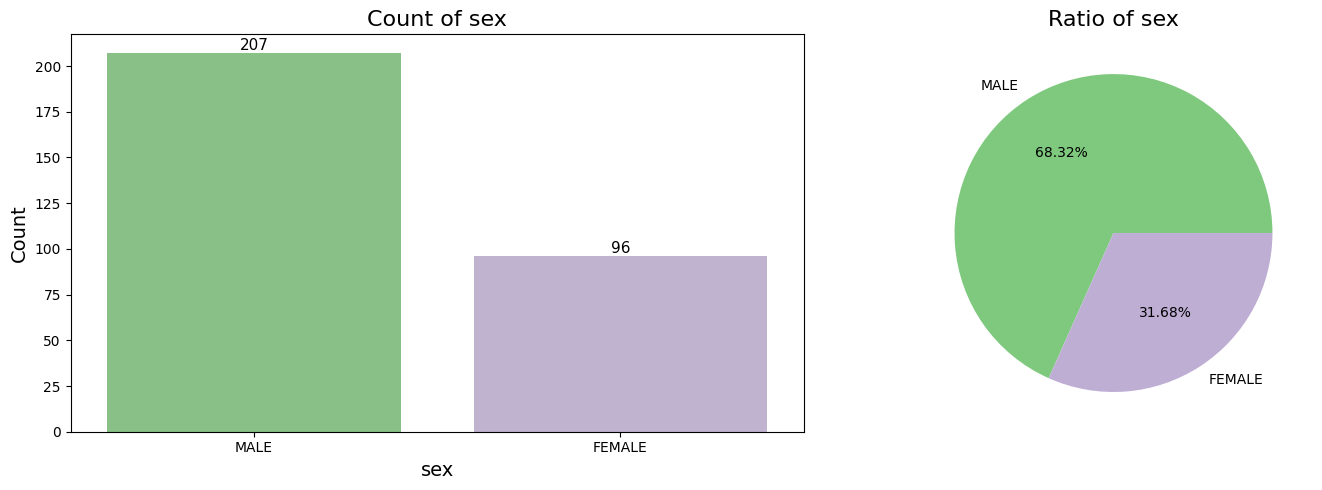

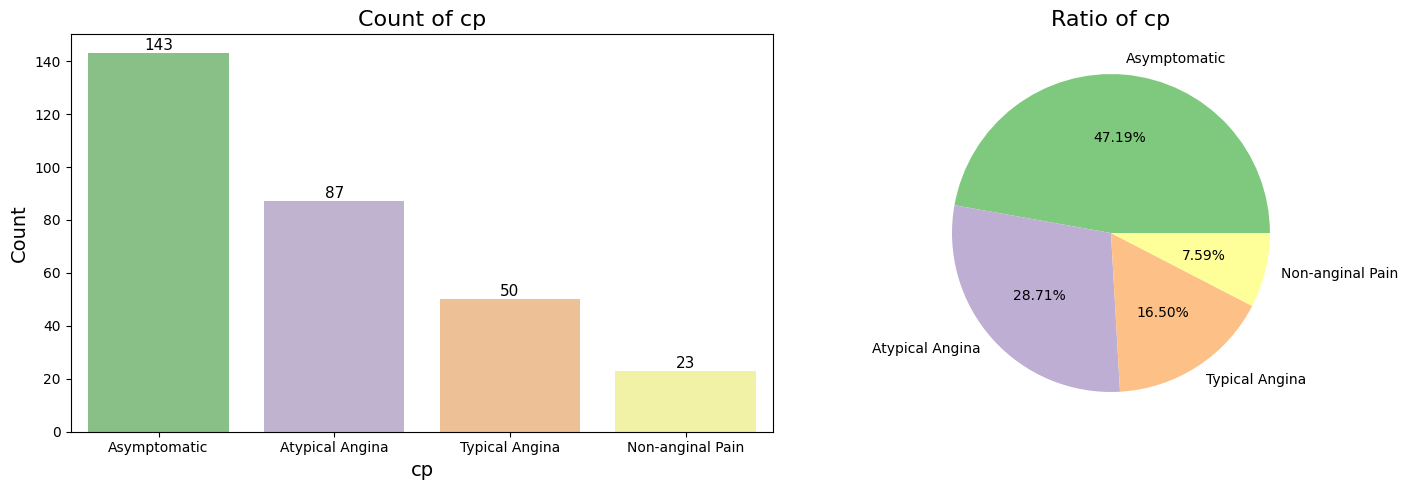

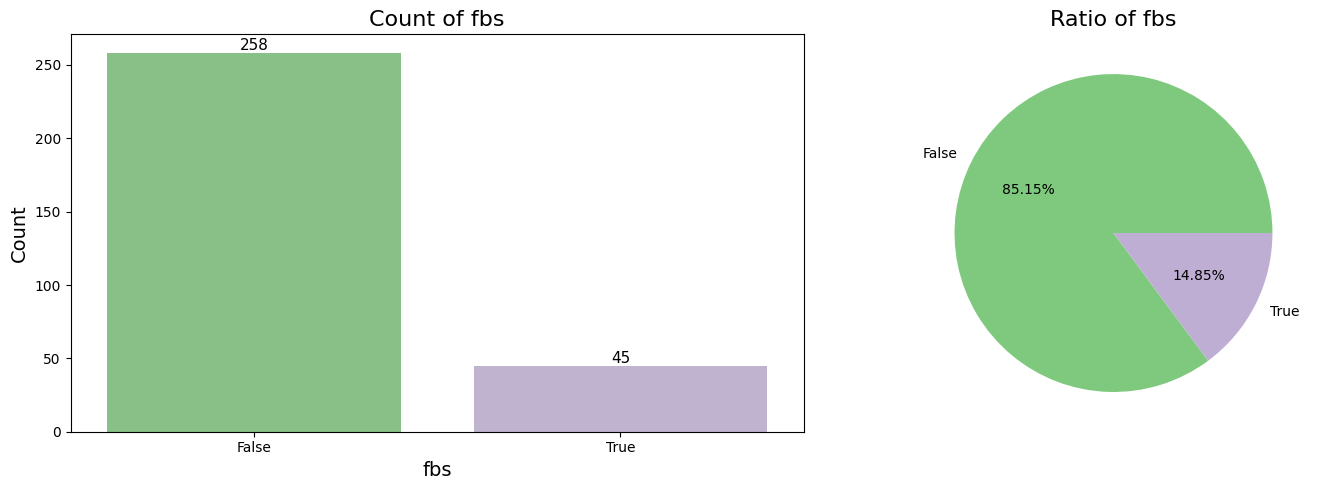

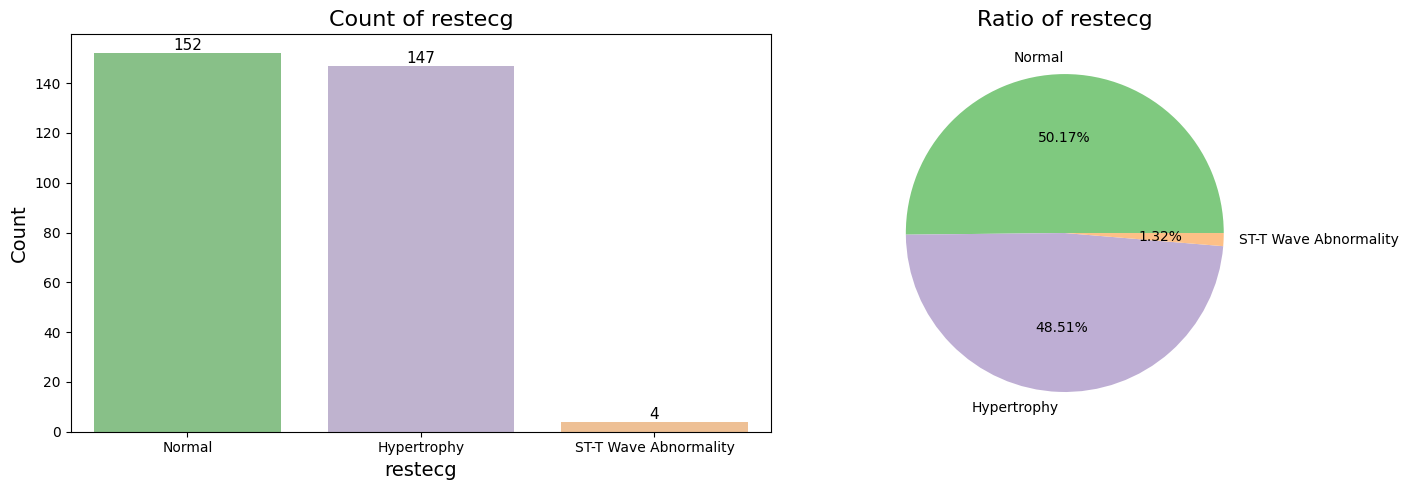

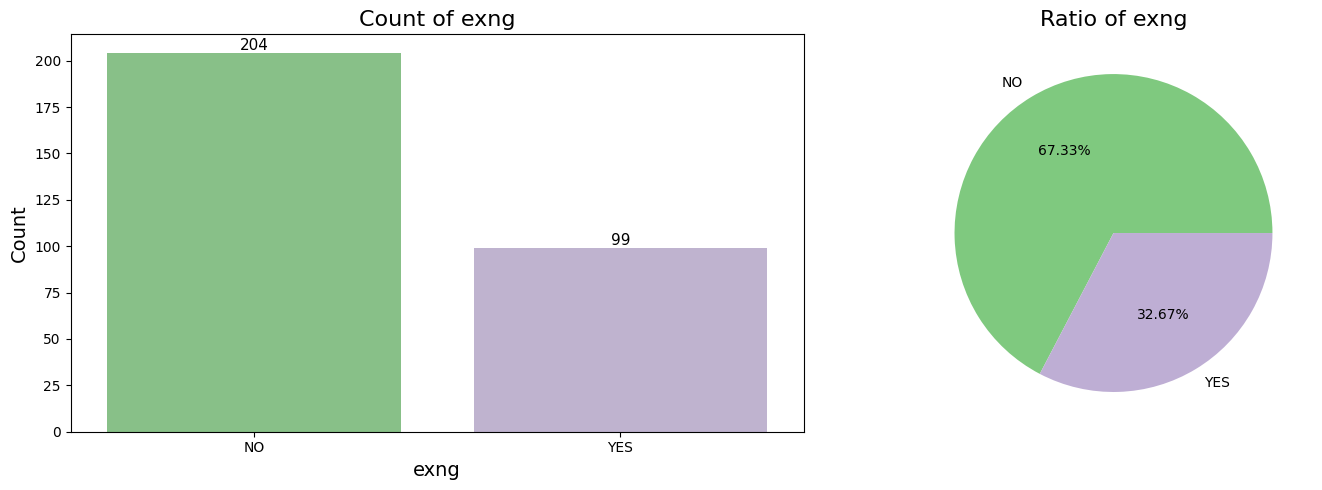

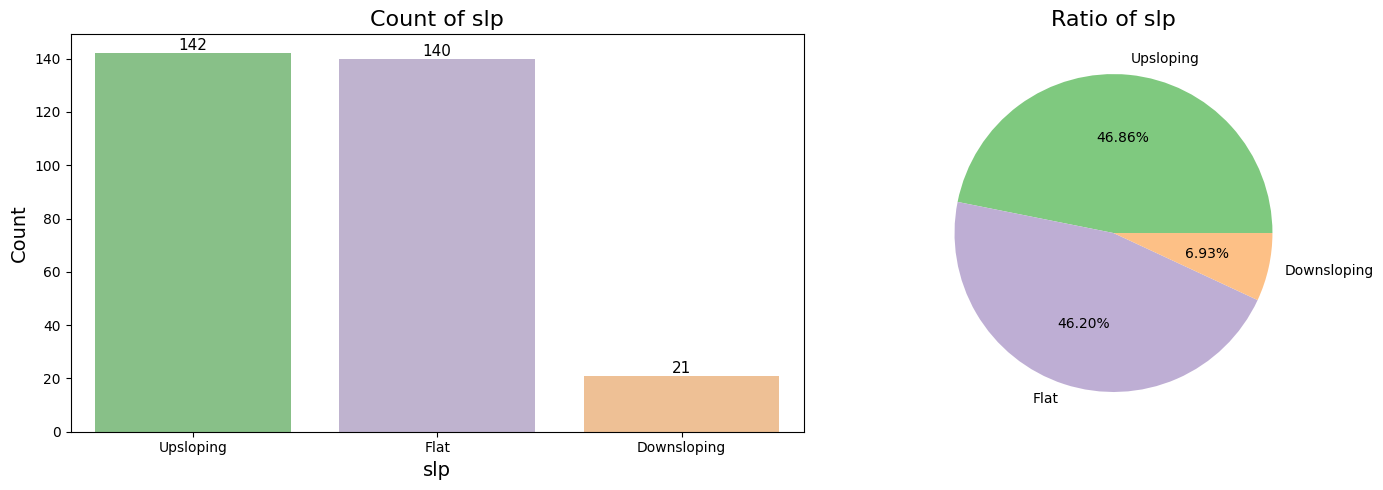

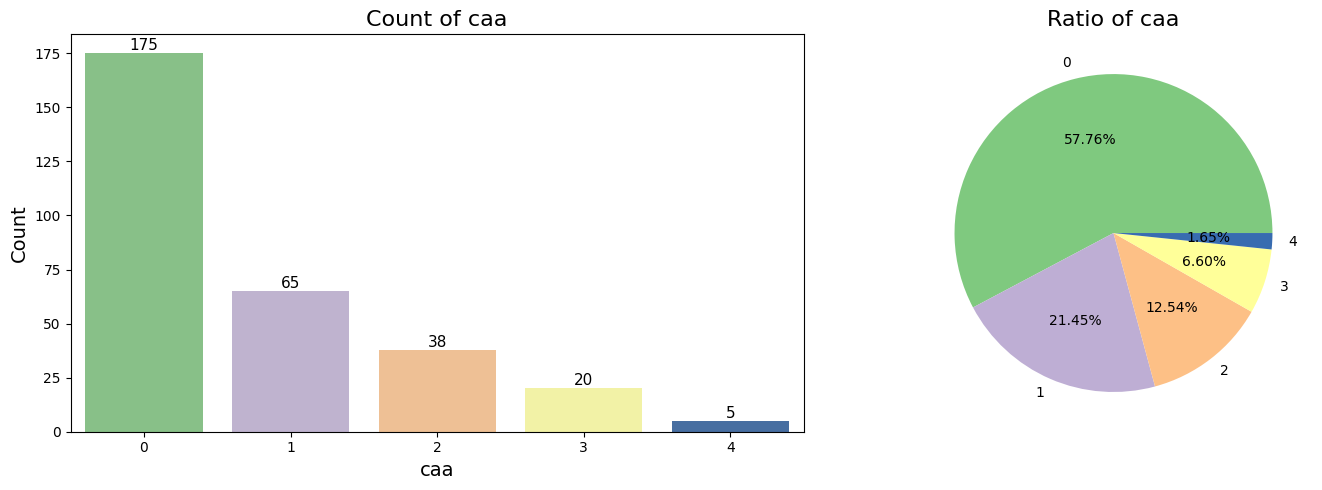

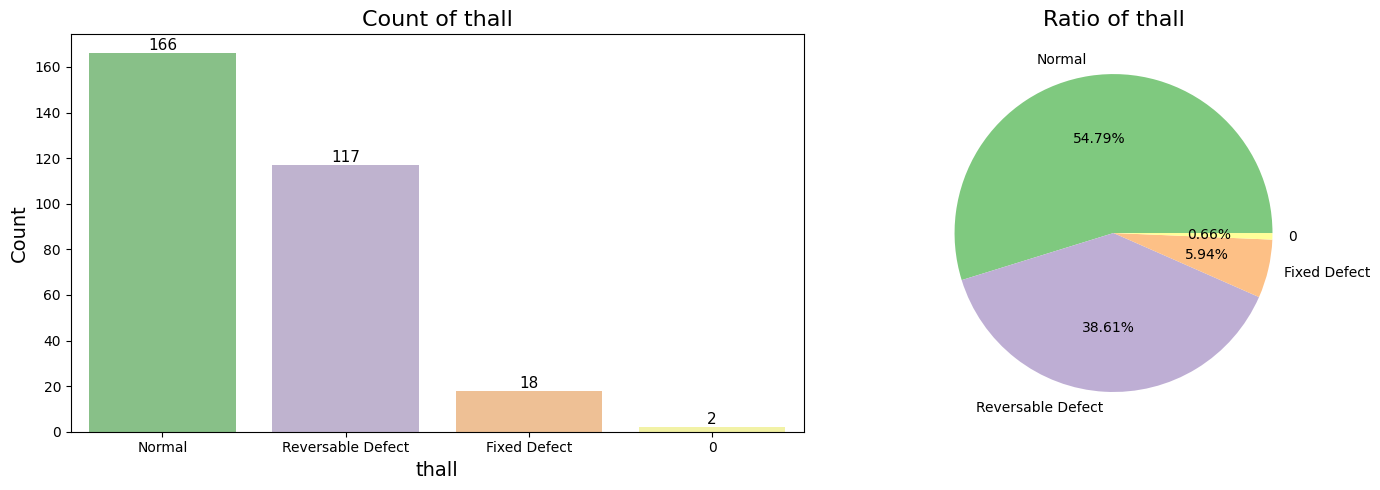

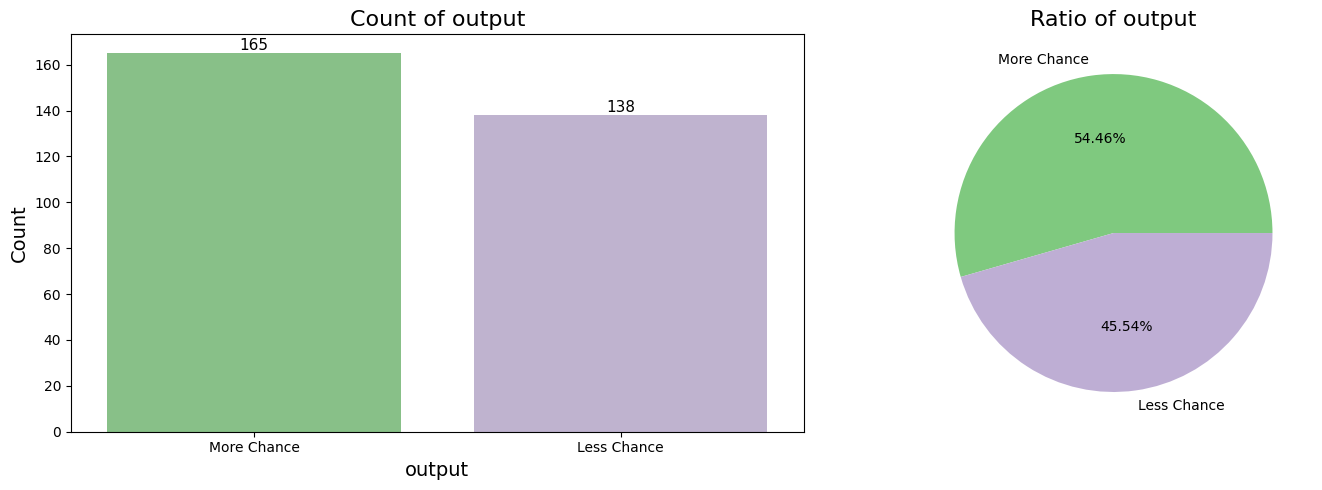

In [ ]:
palette_color = sns.color_palette('Accent')

for col in df_copy[cat_cols]:
  fig, axs = plt.subplots(1,2, figsize = (15, 5))

# Countplot
  ax = sns.countplot(data=df_copy,
                     x=df_copy[col],
                     ax = axs[0],
                     order = df_copy[col].value_counts().index,
                     palette='Accent');

  for container in ax.containers:
      ax.bar_label(container, fontsize=11)

  ax.set_xlabel(f'{col}', fontsize=14)
  ax.set_ylabel('Count', fontsize=14)
  axs[0].set_title(f"Count of {col}", fontsize=16)

# Pie plot
  ax2 = df_copy[col].value_counts().plot.pie(
                                             ylabel='',
                                             ax = axs[1],
                                             colors=[palette_color[i] for i in range(df_copy[col].nunique())],
                                             autopct='%.2f%%');
  axs[1].set_title(f"Ratio of {col}", fontsize=16);
  plt.tight_layout()

**Insights of Categorical Analysis**

**Sex**
* 207 of patients are male, 96 are female.
* 68.32% of the patients are male and 31.68% are female.
* The number of male patients in the data set is 2.15 times the number of female.
---
**CP (Chest Pain)**
* Almost half of the patients in the dataset have **asymptomatic** chest pain.
  - Observations show us that **143** patients experienced this type of pain and the ratio to other types of chest pain is **47.19%**.
* Just over a quarter of patients have **atypical angina**.
  - Observations show us that **87** patients experienced this type of pain and the ratio to other types of chest pain is **28.71%**.
* The remaining two chest pain types are less than the other two. These types are **typical angina** and **non-anginal** pain.
  - The number of patients with typical angina is **50** and the ratio to all patients is **16.50%**.
  - Lastly, The number of patients with typical angina is **23** and the ratio to all patients is **7.59%**.
---
**FBS (Fast Blood Sugar)**
* If patient's fasting blood sugar is lower than 120 mg/dl patient has no diabetes (0/False). On the other hand if patient's fasting blood sugar is higher than 120 mg/dl patient has diabetes (1/True).
  - Individuals with diabetes (fbs:1/True) in the data set are 45 people with a rate of 14.85%.
  - There are **258** people in the dataset who do not have diabetes (fbs:0/False), and their rate is **85.15%**.
---
**restecg (Resting Electrocardiographic)**
* The first thing that stands out is that the two values are almost equal and make up almost half of the data set. Another thing is that the third value is negligible.
  - The number of patients with normal resting electrocardiography results is **152**, with a rate of **50.17%**.
  - The percentage of patients with hypertrophy value is **48.51%** and their number is **147**.
  - The negligible result is having ST-T wave abnormality. This abnormality has only **4** patient and the rate is **1.32%**.
---
**Exang (Exercise induced angina)**
* According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
  - Observations show us that there are 2.06 times less patients with exang than those without.
  -The number of "Exang" patients is **99** with a rate of **32.67%** those who don't have is **204** with rate of **67.33%**.
---
**slp (the slope of the peak exercise ST segment)**
* The lowest value observed is in patients with a downsloping ST wavelength, with a number of **21** patients, and the rate is **6.93%**.
* Once again the remaining two variables are almost equal.
  - The number of patients with flat/stable ST wavelength and upward sloping ST wavelength is **142-140** patients and the rate is **46.86%-46.20%**, respectively.
---
**caa (number of major vessels)**
* This variable is the number of major vessels colored by fluoroscopy.
  - More than half patients (175 patients - 57.76%) the number of major vessels is 0.
  - The second highest percentage (21.45%) is value major vessel number 1 with 65 patients.
---
**thall (Thallium stress test)**
* The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
* There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.
* According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
* Observation shows that **54.79%** of **166** patients had a normal Thallium stress test result.
* **36.61%** (**117** patient) has a reversible defect Thallium stress test result.
*  **5.94%** (**18** patient) has a fixed defect Thallium stress test result.
---
**Output**
* More than half of the patients, **54.46% (165 patients)**, have a heart attack risk. The remaining **45.54% (138 patients)** have no heart attack risk.

<a name="section-five"></a>
### **Numerical Analysis**

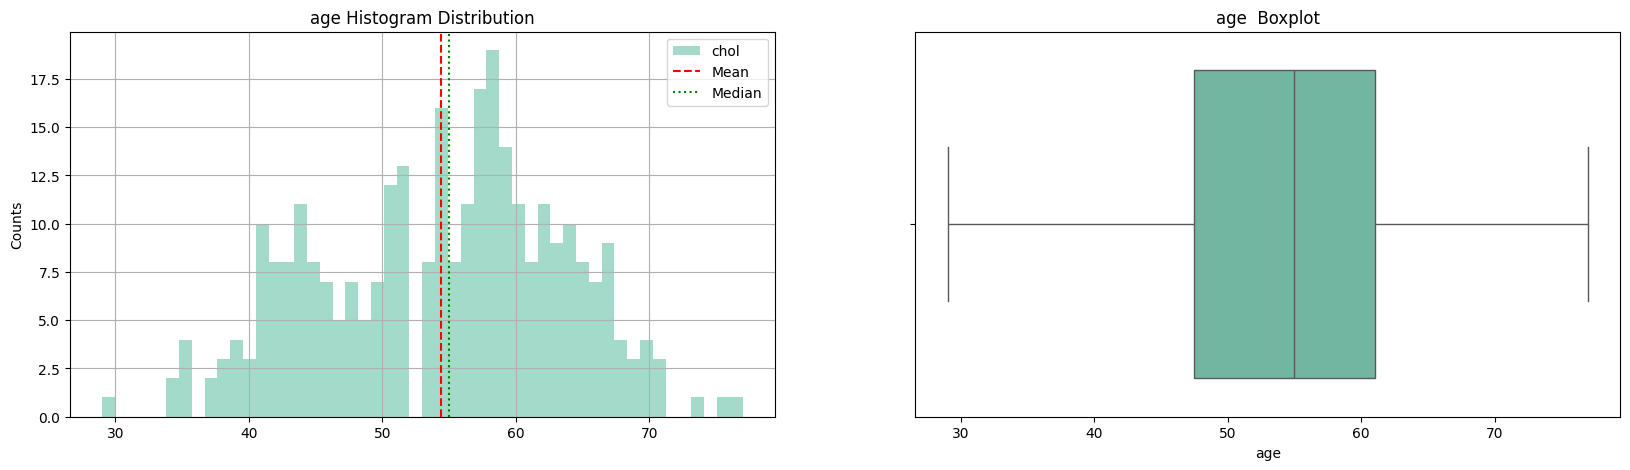

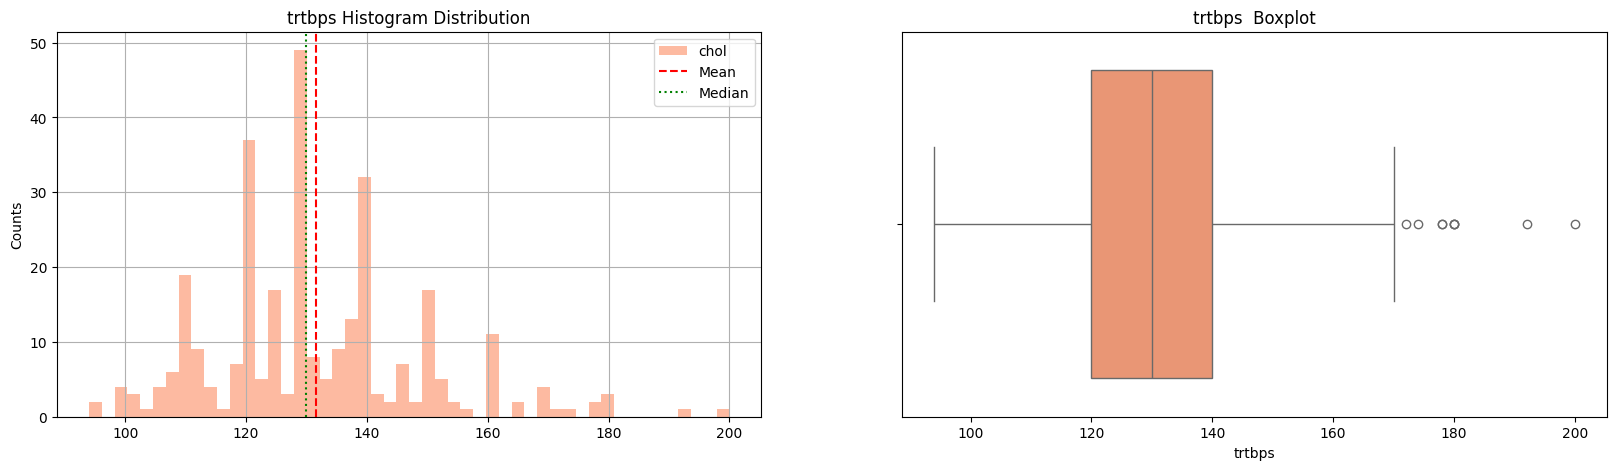

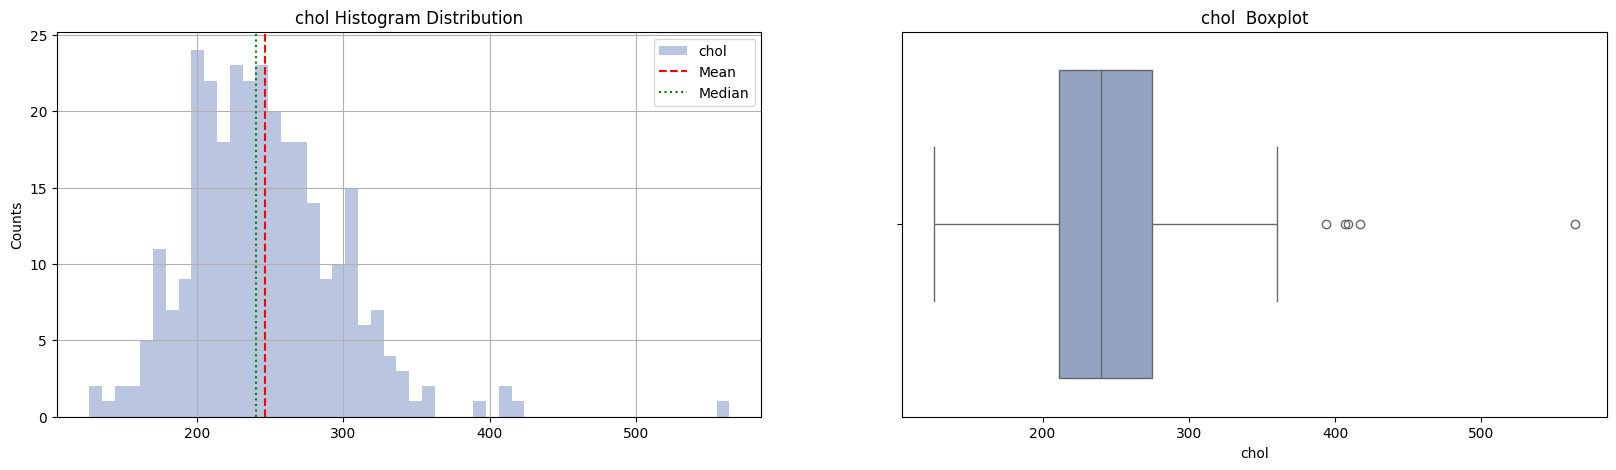

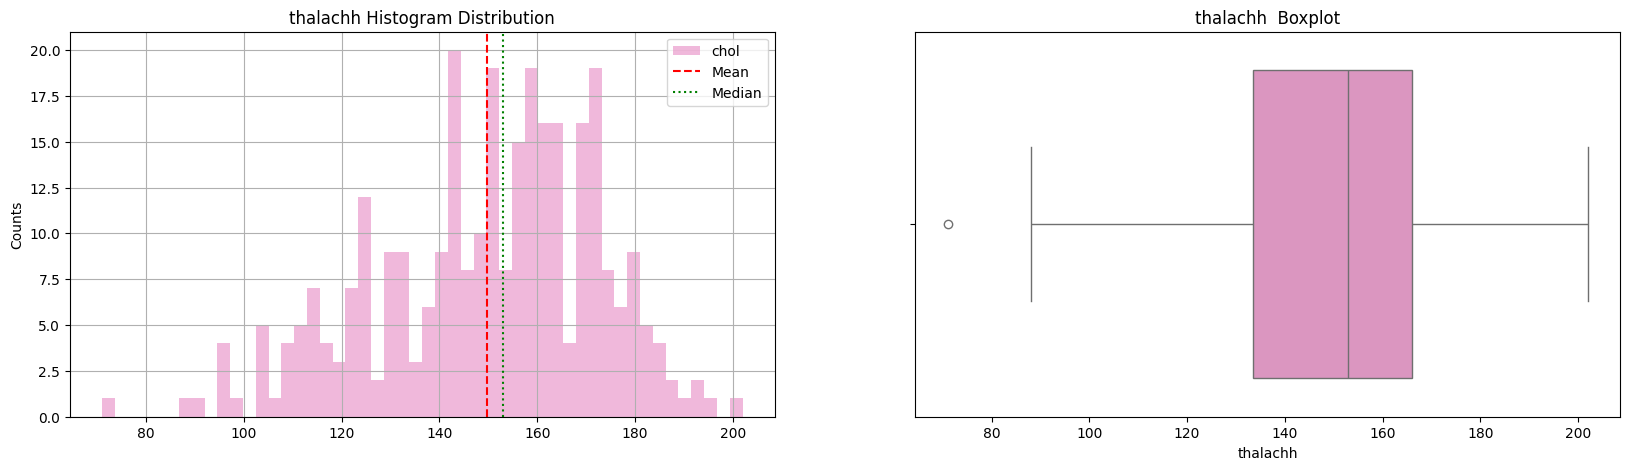

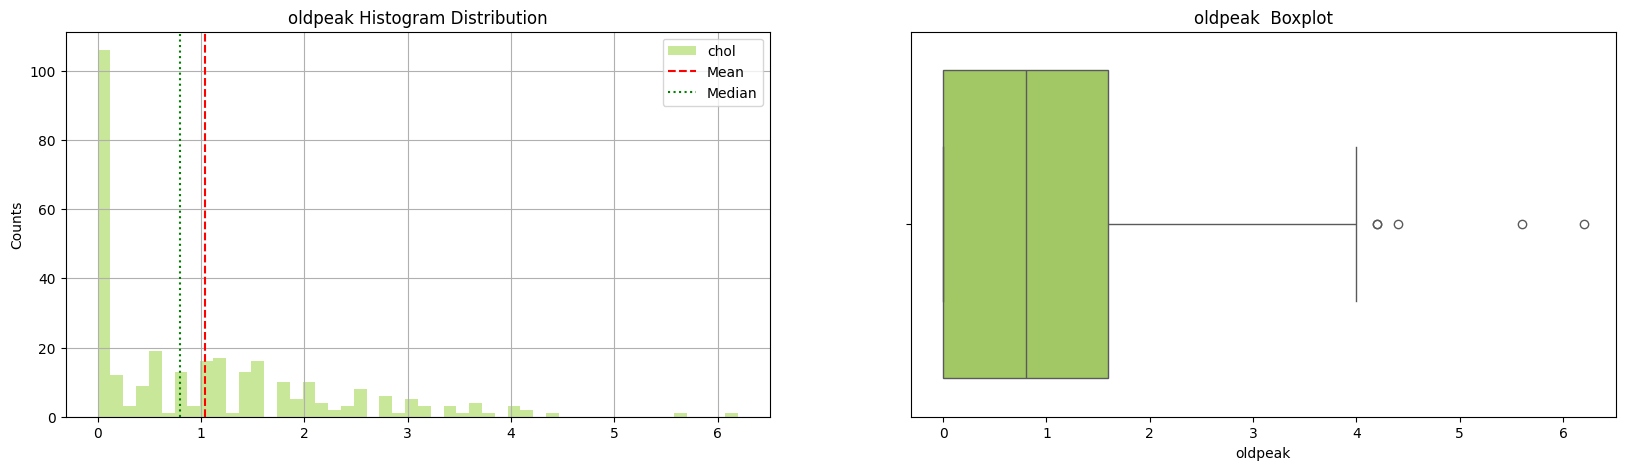

In [ ]:
palette_color = sns.color_palette('Set2')

for idx, col in enumerate(df_copy[num_cols]):
  plt.figure(figsize=(20, 5))

  plt.subplot(1, 2, 1)
  df_copy[col].hist(bins=50, label='chol', alpha=0.6, color=palette_color[idx])
  plt.axvline(np.mean(df_copy[col]), ls='--', c='r', label="Mean")
  plt.axvline(np.median(df_copy[col]), ls=':', c='g', label="Median")
  plt.ylabel("Counts")
  plt.title(f"{col} Histogram Distribution");
  plt.legend()

  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_copy[col], data=df_copy, color=palette_color[idx])
  plt.title(f"{col}  Boxplot");

**Insights of Numerical Analysis**

**Age**
* The vast majority of patients are between 50 and 60.
* Mean of age is somewhere between 54-55 and median is most-likely is 55.
* According to boxplot and histogram it looks like there is no outlier data in the age variable.
---
**trtbps (resting blood pressure (in mm Hg on admission to the hospital))**
* trtbps value in most patients is between 120-and 140
* Mean of trtbps is around 131 and median of trtbps very likely 130
* According to boxplot and histogram it seems that there may be two outlier data after 180 trtbps.
---
**chol (serum cholestoral in mg/dl)**
* The cholestoral of most patients is generally between 200 and 280.
* Both mean and median of chol is somewhere around 240.
* Highest values can be considered an outlier.
---
**thalachh (maximum heart rate achieved)**
* The maximum heart rate achieved in most patients is between 140-170
* Both mean and median of chol is approximately 150.
* The value under 80 can be considered an outlier.
---
**oldpeak (ST depression induced by exercise relative to rest)**
* Values of the vast majority of patients are between 0 and 1.5.
* Mean of oldpeak is like 1 and median of trtbps more less 0.75
* Values above 3 can be considered outliers.

<a name="section-six"></a>
## **Bi-variate Analysis**

<a name="section-seven"></a>
### **Categoric vs Target**

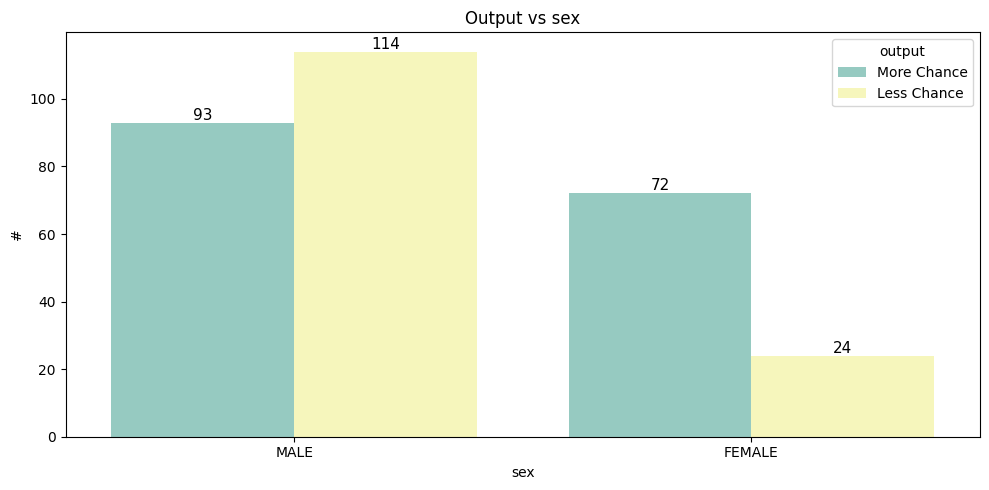

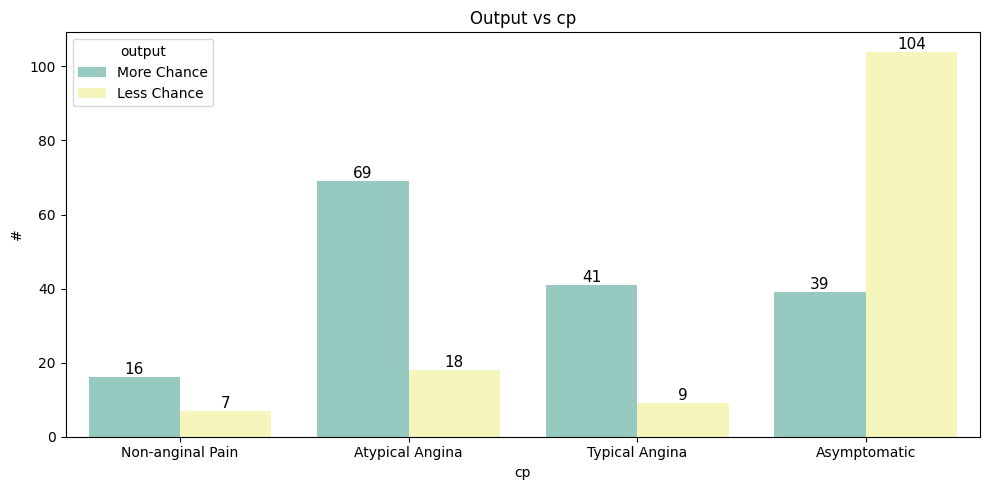

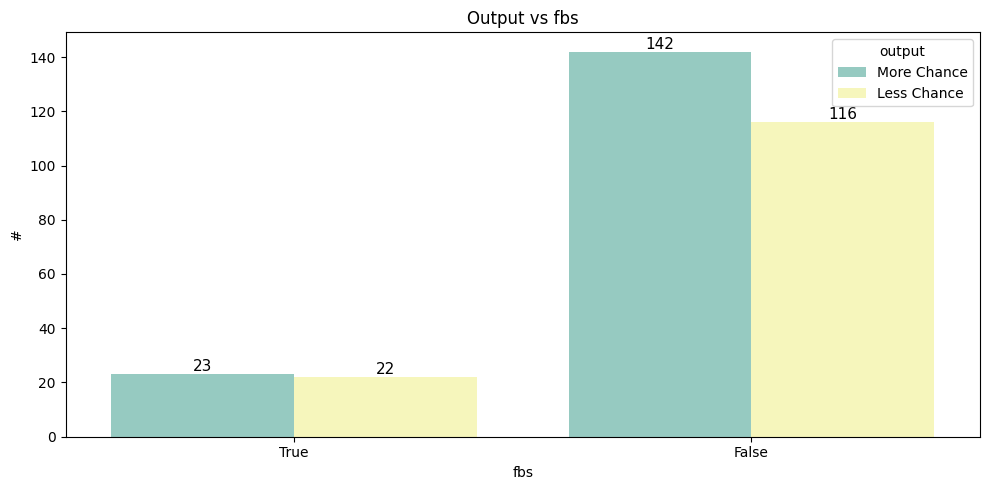

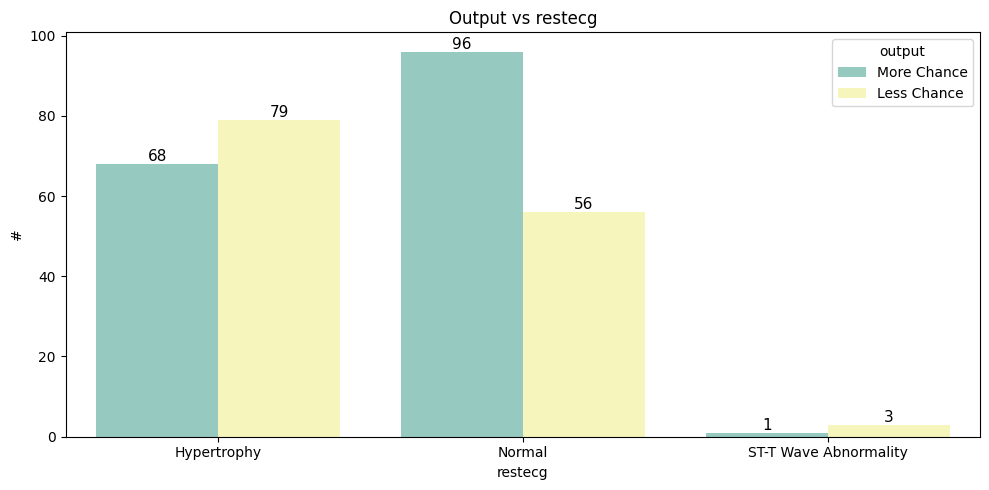

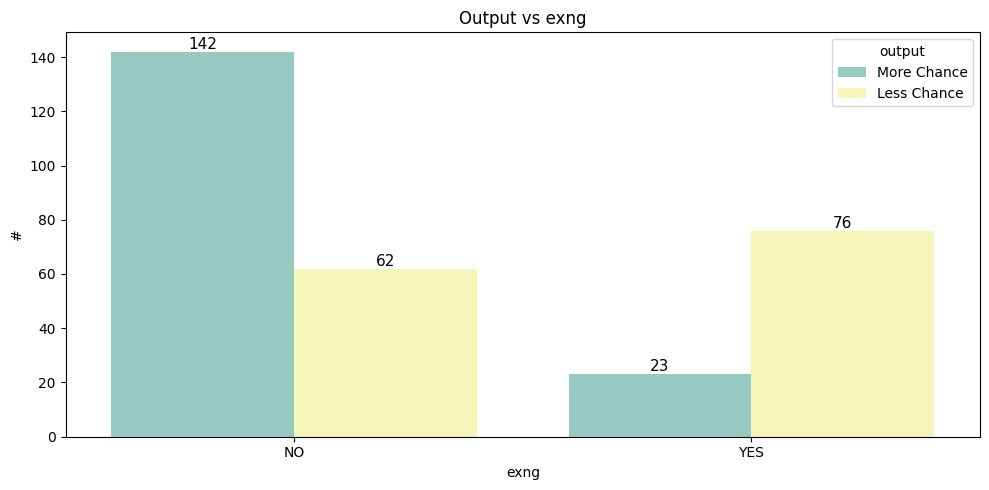

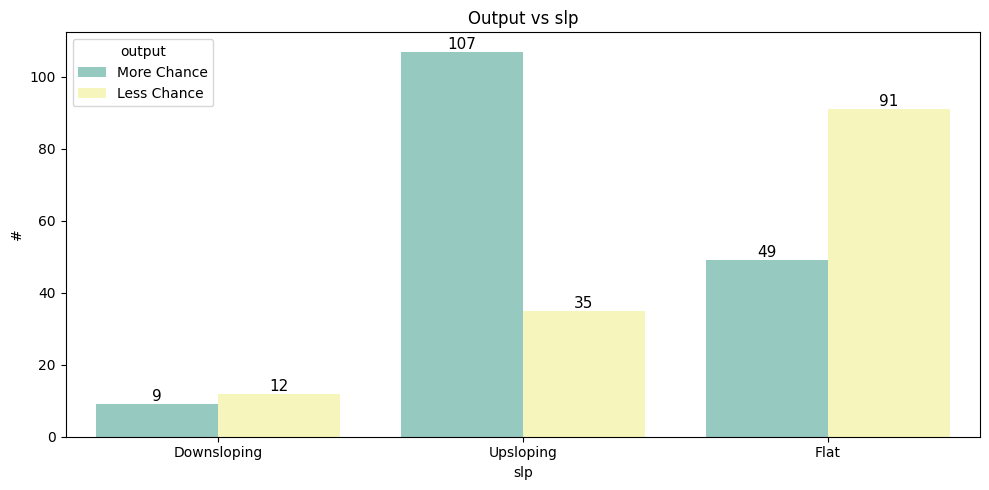

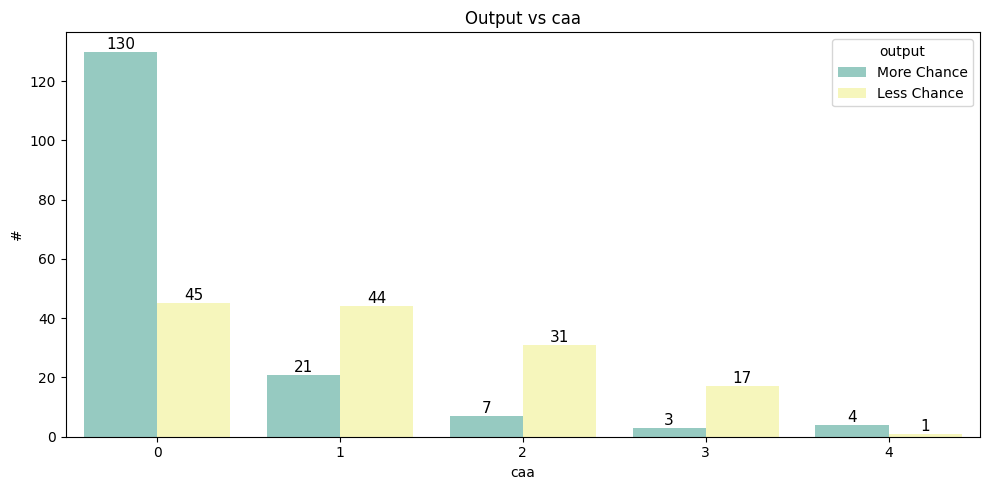

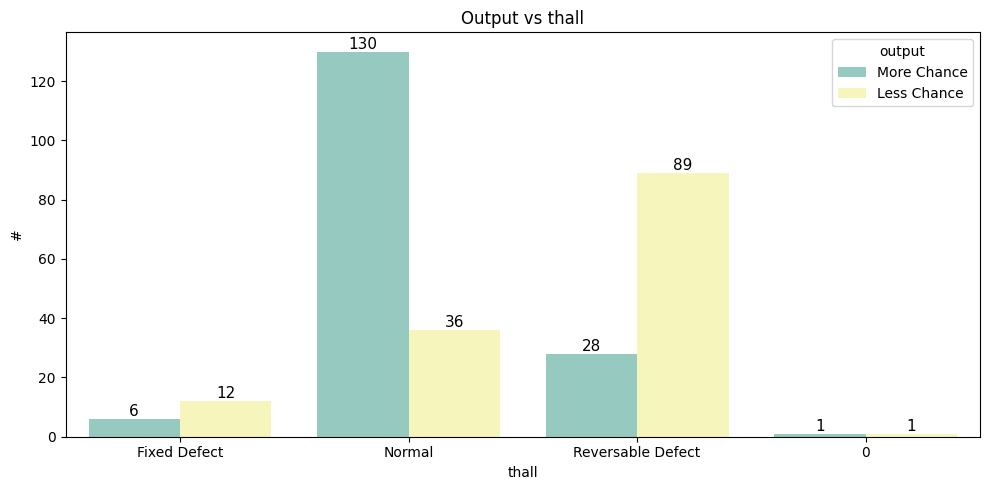

In [ ]:
for col in cat_cols:
  if col == 'output':
    pass
  else:
    plt.subplots(1,1, figsize = (10, 5))
    ax = sns.countplot(data=df_copy,
                  x=df_copy[col],
                  hue=df_copy['output'],
                  palette="Set3");
    for container in ax.containers:
      ax.bar_label(container, fontsize=11)
    plt.title(f"Output vs {col}")
    plt.ylabel("#")
    plt.xlabel(f"{col}");
    plt.tight_layout()

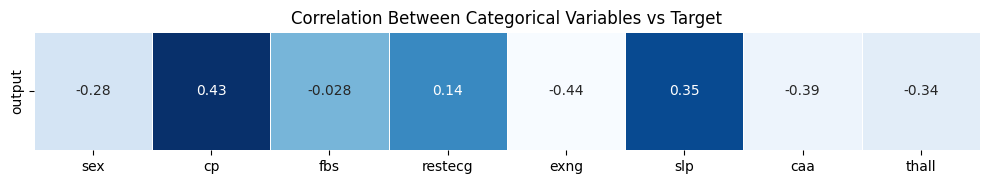

In [ ]:
plt.figure(figsize=(10,2))
corr_mx = df[cat_cols].corr()
corr_mx = corr_mx.iloc[:-1, [-1]].T
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="Blues",
            cbar=False,
            annot=True)
plt.title("Correlation Between Categorical Variables vs Target")
plt.tight_layout()

**Insights of Categoric vs Target Analysis**


**Sex vs Target**
* Of the 303 observations in the data set, **207** are male and the remaining **96** are female.
  - **46.86 percent** of male observations are more chance to have a heart attack.
  - **75 percent** of female observations are more chance to have a heart attack.
  - In summary, female patients are at higher risk for heart attack.
* The correlation between 'Sex' and 'Output' is **-0.28**. In other words, we can say that there is a negative low-intensity correlation.
---
**CP vs Target**
* Patients with **Asymptomatic** pain are less likely to have a heart attack.
* In the other three types of pain, having a heart attack is higher than the risk of not having it.
* The correlation between the two variables is **0.43**. In other words, we can say that there is a positive, moderately strong correlation.
---
**FBS vs Target**
- Of the 303 observations in the data set:
  * **258** had fasting blood sugar. **55 percent** of these patients are more chance to have a heart attack.
  * **45** had no fasting blood suagr. **51 percent** of these patients are more likely to have a heart attack.
- The correlation between the two variables is **-0.028**. In other words, we can say that there is a very low-intensity correlation in the negative direction.
---
**Restecg vs Target**
* Attention should be paid to patients with a "rest ecg" value of **Normal**. Because the risk of having a heart attack is almost two times higher than that of not having a heart attack.
* **Hypertrophy and ST-T Wave Abnormality** observation values are also more likely not to have a heart attack.
* The correlation between the two variables is **0.14**. In other words, we can say that there is a positive low-intensity correlation
---
**Exng vs Target**
* If the patient's "exang" variable is **1/Yes**, that is, if he has exercise-related angina, the probability of not having a heart attack is (**76.77 percent**) higher.
* In contrast, patients who do not have exercise-related angina are more likely to have (**69.91 percent**) a heart attack.
* The correlation between the two variables is **-0.44**. In other words, we can say that there is a negative, moderately strong correlation
---
**Slp vs Target**
* It is necessary to pay attention to the patients with a "Upsloping". Because these patients are **3.1** times more likely to have a heart attack than not having a heart attack.
* The observations shows us that the risk of heart attack is lower in patients with an observation **Downsloping and Flat**.
* The correlation between the two variables is **0.35**. In other words, we can say that there is a positive, moderately strong correlation.
---
**Caa vs Target**
* The group at risk for this variable is patients with an observation value of 0. Because these patients almost **2.89** times higher in patients with an observation **value of 0**.
* For **1, 2, and 3 observation values**, this shows the opposite situation. In other words, patients with "ca" observation values of 1, 2, and 3 are almost twice as likely to have a heart attack as those not having them.
* There is something remarkable here. Although the number of patients with a CA **value of 4** is less than the general population, the risk of having a heart attack seems to be higher.
* The correlation between the two variables is **-0.39**. In other words, we can say that there is a negative, moderately strong correlation.
---
**Thall vs Target**
* Patients with an **Normal Thall** are **3.61** times more likely to have a heart attack than if they have not.
* **The remaining values** have a low risk of heart attack.
* The correlation between the two variables is **-0.36**. In other words, we can say that there is a negative, moderately strong correlation.

<a name="section-eight"></a>
### **Numeric vs Target**

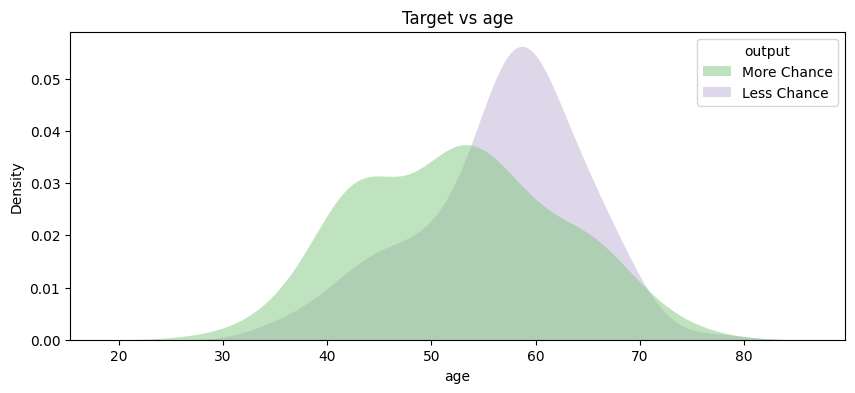

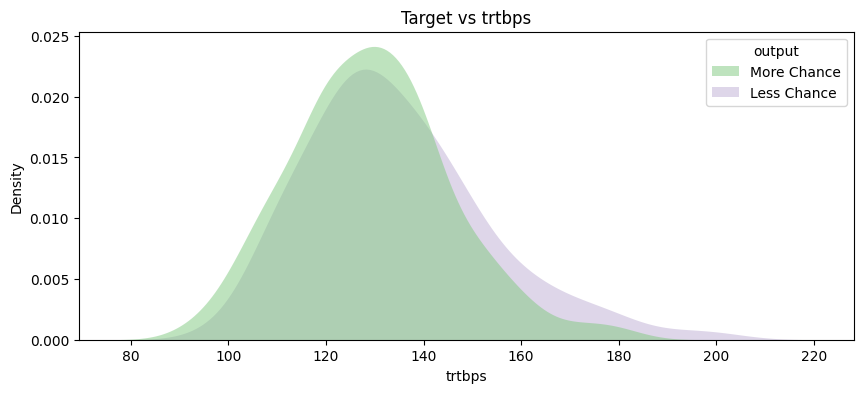

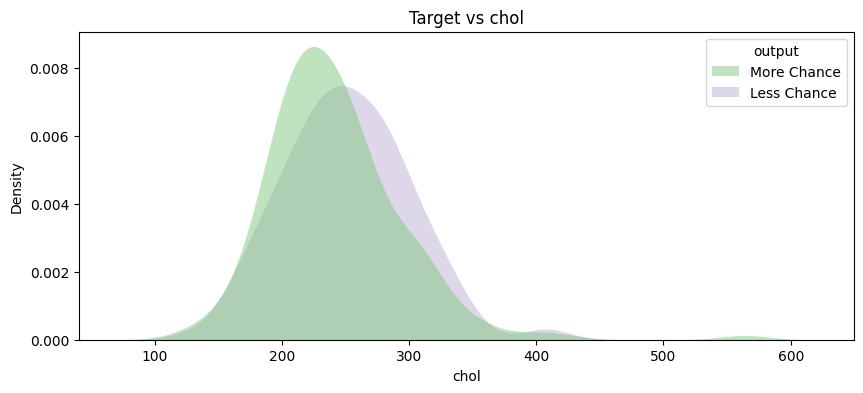

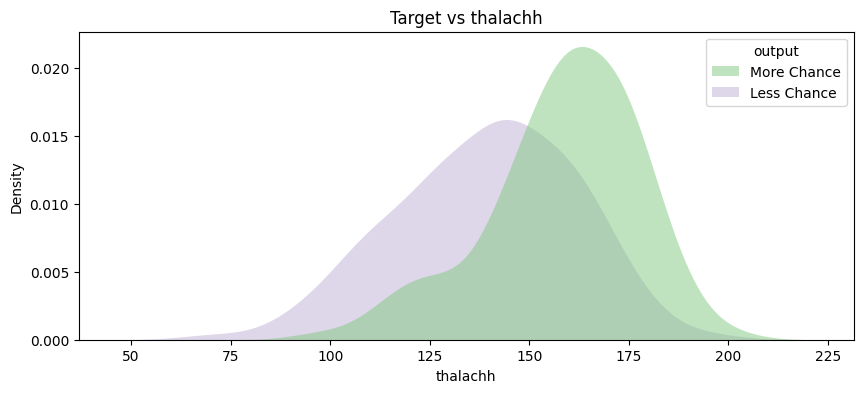

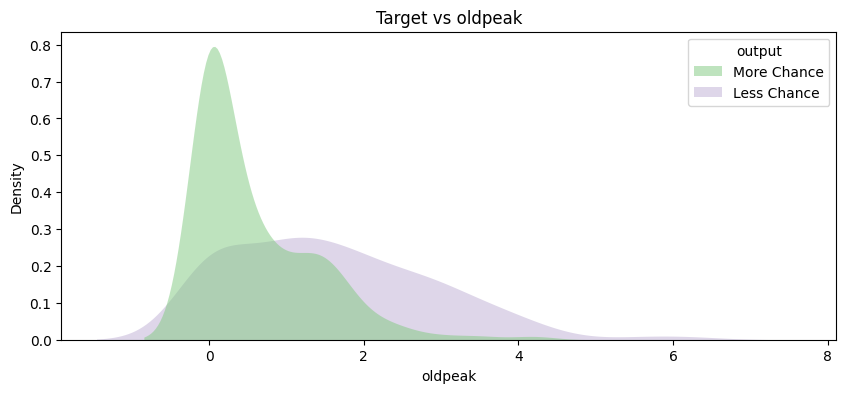

In [ ]:
for col in num_cols:
  plt.subplots(1,1, figsize = (10, 4))
  sns.kdeplot(data=df_copy, x=col, hue="output",
              fill=True, common_norm=False, palette="Accent",
              alpha=.5, linewidth=0)
  plt.title(f"Target vs {col}")

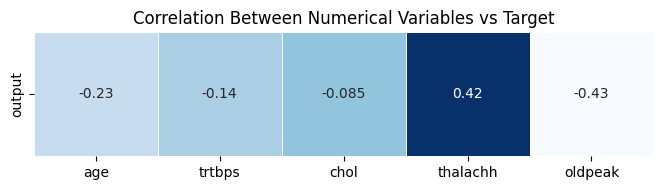

In [ ]:
num_cols.append('output')

plt.figure(figsize=(10,2))
corr_mx = df[num_cols].corr()
corr_mx = corr_mx.iloc[:-1, [-1]].T
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="Blues",
            cbar=False,
            annot=True)
plt.title("Correlation Between Numerical Variables vs Target")
plt.tight_layout()

**Insights of Numeric vs Target Analysis**

**Age vs Target**
* Observations show that, contrary to popular belief, the risk of heart attack decreases as we age.
* It's just a general thought that older people may be more likely to have a heart attack, but from a graph of the age and target distribution, it's clear that this isn't the case.
* The correlation between the two variables is **-0.23**. In other words, we can say that there is a negative low-intensity correlation.
---
**trtbps vs Target**
* The graph of possibilities are almost identical. Therefore it is complicated to predict whether a patient will have a heart attack from resting blood pressure data.
* The correlation between the two variables is **-0.14**. In other words, we can say that there is a negative low-intensity correlation.
---
**chol vs Target**
* In the graph, we can say that a cholesterol value of 200-250 is precarious for the patients.
* If you have noticed, especially at the beginning of the graph, patients with and without heart attack risk a similar image, while the increase in the probability of having a heart attack from 180 to 250 is noticeable.
* After the value of 250, it becomes difficult to differentiate the probability of patients having a heart attack.
* The correlation between the two variables is **-0.085**. In other words, we can say that there is a very low-intensity correlation in the negative direction.
---
**thalachh vs Target**
* There is a situation that is evident in this graph.
The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.
* If you have noticed, there is a parallel increase in the two possibilities up to 150. However, after a value of 150, patients with a low probability of having a heart attack decrease, while patients with a high-risk probability increase incredibly.
* It is evident in the distinction between the two bumps in the graph. This indicates that there is a correlation between the two variables.
* The correlation between the two variables is **0.42**. In other words, we can say that there is a positive, moderately strong correlation.
---
**oldpeak vs Target**
* When we look at the graph, if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.
* We can say that the range of 0 to 1.5 is the critical threshold for us.
* It is evident in the distinction between the two bumps in the graph. This indicates a correlation between the two variables.
* The correlation between the two variables is **-0.43**. In other words, we can say that there is a negative, moderately strong correlation.

<a name="section-nine"></a>
## **Multi-variate Analysis**

<a name="section-ten"></a>
### **Examining Numeric Variables Among Themselves**

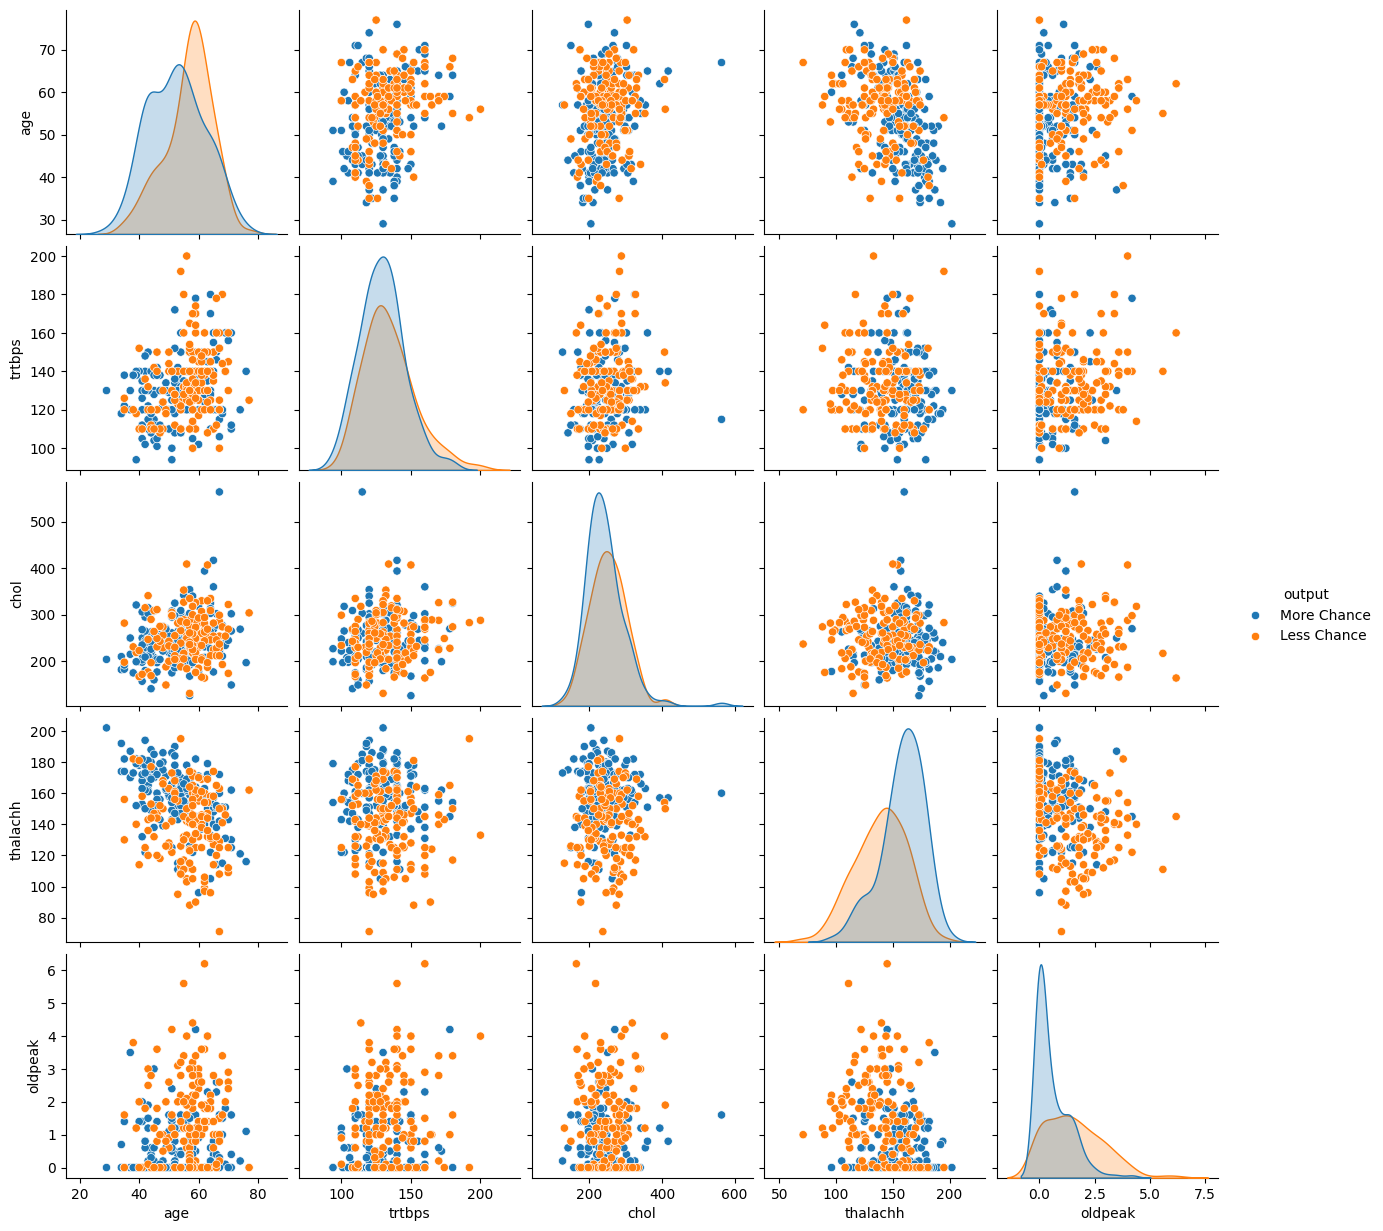

In [ ]:
num_cols.remove('output')
sns.pairplot(data=df_copy, hue = "output", vars = num_cols);

**Insights of Numeric Variables Among Themselves**

**Age Variable**

* The age variable with the most relationship is the "thalach" variable.
* There is a collection of points extending in the southwest direction.
* There is a negative correlation since the points are pointing downwards.
* However, since the points are somewhat scattered, this correlation is moderate.
---

**Trtbps Variable**

* The relationship between "Trtbps" and other variables is weak.
* There is clutter in the graphics in general.
* With the age variable, the dots appear a little more often. There is a positive correlation.
* The lowest correlation is with the "thalach" variable. The dots are incredibly messy. There is no smooth distribution.
---

**Chol Variable**

* The variables that have the highest correlation with the variable "chol" are "age" and "trtbps".
* However, the relationship between the "age" variable is slightly higher.
* So cholesterol increases with age.
* There is almost no relationship with other variables.
---

**Thalach Variable**

* The age variable has the most relationship with the Thalach variable. There seems to be a moderately negative relationship.
* There is not much correlation between the variable "trtbps" and "chol". The dots are too scattered.
* When we look at the relationship with the "old peak" variable, we can say a close relationship with the middle level.
---

**Oldpeak Variable**

* We cannot find an explicit expression when interpreting the graphics of this variable because the relationship with all variables is similar to each other.
* However, we can say this in general: There is a close relationship with moderate with all variables.

<a name="section-eleven"></a>
### **Exporting Correlation Matrix**

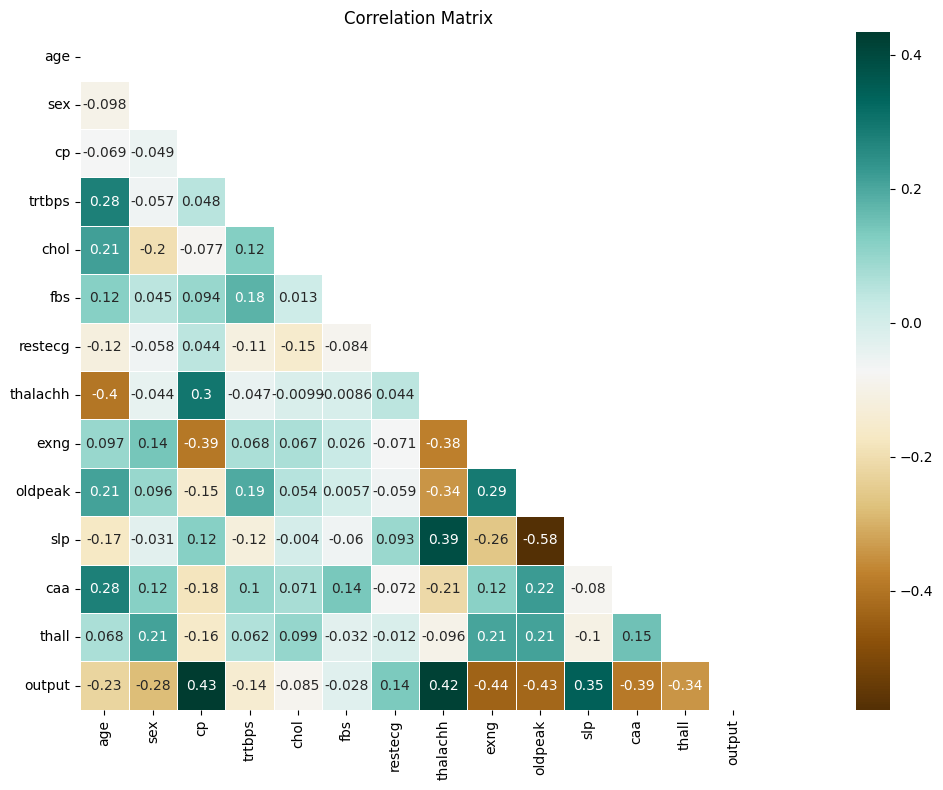

In [ ]:
plt.figure(figsize=(20,8))
corr_mx = df.corr()
mask = np.triu(corr_mx)
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="BrBG",
            mask=mask,
            annot=True)
plt.title("Correlation Matrix")
plt.tight_layout()

**Insights of Correlation Matrix**

**Age Variable**

* The variable with the highest correlation with the "age" variable is the "thalach" variable. There is a negative correlation between them, which we can call moderately.
* The severity of the correlation is -0.40. In other words, there is an inverse relationship between the "age" and "thalach" variables.
---

**Sex Variable**
* There is no robust correlation between the variable "Sex" and other variables.
* The highest figure is -0.28 with the target variable. There is a negative low-intensity correlation between them.
---

**CP Variable**
* Cp variable captures the high correlation with "thalach", "exang", and "output" variables.
* The highest is again the "target" variable. There is a direct proportion between them.
---

**trtbps Variable**
* The variable with the highest correlation with the "trtbps" variable is the "age" variable. The correlation between them is 0.28
* There is a positive low-intensity correlation.
---

**Chol Variable**
* The variable with the highest correlation with the "chol" variable is the "age" variable. There is a correlation with a magnitude of 0.21. This is a low positive correlation.
* So, we can say that as age increases, cholesterol also increases.
---

**fbs Variable**
* The "Fbs" variable generally does not correlate with other variables.
* The highest correlation with 0.18 belongs to the "trtbps" variable. There is a low positive correlation.
* But we can say that when fasting blood sugar increases, resting blood pressure also increases.
---

**restecg**
* There is no strong correlation between the "Rest_ecg" variable and other variables.
* The highest correlation was 0.14 with the "output" variable. There is a positive low-intensity correlation.
---

**Thalach Variable**
* The variable with the highest correlation to the "Thalach" variable is the "output" variable.
* There is a 0.42 positive and moderate correlation between them. In other words, it is a variable that can directly trigger a heart attack.
* There is a variable with which this variable has many correlations.
* It means that the maximum heart rate reached maybe a situation triggered by other variables.
---

**exng Variable**
* The variable with the highest correlation to the exercise-induced angina variable is the output variable with -0.44
* Also, It seems to be associated with more than one variable except "output".
---

**oldpeak Variable**
* It has the most significant correlation ratio among this changing table. This correlation is -0.58 with the "slope" variable.
* There is a negative correlation between them, which is slightly above medium intensity.
* The most significant correlation after the "slope" variable is with the "output" variable.
---

**slp Variable**
* The variable with the highest correlation to the "slope" variable is the old peak variable. There is an above-moderate correlation between these two. It is the most significant relationship in the table with 0.58
* It has a moderate correlation with the variables "thalach" and "output".
* The relationship with other variables is fragile
---

**caa Variable**
* The variable with which the "Ca" variable has the highest correlation is the target variable with -0.39.
* Then comes the "age" variable with 0.28. We can say that there is a low positive correlation with the age variable.
---

**thall Variable**
* The variable with which the "Thal" variable has the highest correlation is the variable "output" with -0.36.
* It has not had very high correlation coefficients with other variables.

## **Project Conclusion**

* The main scope of the project is to perform Exploratory Data Analysis (EDA).
* Within the scope of univariate analysis, I analyzed numerical and categorical variables using Histplot, Pie Chart and Bar graphs.
* Within the scope of bivariate analysis, I analyzed the variables among themselves using Count Plot, Pair Plot, KDE plot and Heatmap plot.
* See you in the next project!!!